In [89]:
%load_ext autoreload
%autoreload 2

import torch as th
import numpy as np
import matplotlib.pyplot as plt

from SCINet import *
from torchinfo import summary


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
ld = load_data()

In [117]:
train_loader, test_loader = create_loaders(ld)

In [118]:
net = SCINet_block()
net_lstm = LSTM()

In [130]:
evaluate(net, test_loader), evaluate(net_lstm, test_loader)

Total loss:  8.7027
Total loss:  27.3957


(None, None)

In [114]:
# window sz = 40 samples (10k samples)
#Total loss:  20.0502
#Total loss:  40.8646

# window sz = 80 samples
#Total loss:  19.7309

# window sz = 40 samples (20k samples)
#Total loss:  10.9736

# window sz = 40 samples (25k samples)
# Total loss:  8.7027
# Total loss:  27.3957


In [126]:
train(net_lstm, train_loader, test_loader)

[1/50] Total loss:  4.0021e-02
[2/50] Total loss:  2.4283e-03
[3/50] Total loss:  1.5015e-03
[4/50] Total loss:  1.2483e-03
[5/50] Total loss:  1.1240e-03
[6/50] Total loss:  1.0408e-03
[7/50] Total loss:  9.6073e-04
[8/50] Total loss:  8.9747e-04
[9/50] Total loss:  8.6056e-04
[10/50] Total loss:  8.1268e-04	Total loss:  34.2375
[11/50] Total loss:  7.7355e-04
[12/50] Total loss:  7.5171e-04
[13/50] Total loss:  7.2923e-04
[14/50] Total loss:  6.9688e-04
[15/50] Total loss:  6.9707e-04
[16/50] Total loss:  6.8397e-04
[17/50] Total loss:  6.6045e-04
[18/50] Total loss:  6.6181e-04
[19/50] Total loss:  6.2210e-04
[20/50] Total loss:  6.2842e-04	Total loss:  26.1789
[21/50] Total loss:  6.0909e-04
[22/50] Total loss:  5.9045e-04
[23/50] Total loss:  5.8136e-04
[24/50] Total loss:  5.7426e-04
[25/50] Total loss:  5.7162e-04
[26/50] Total loss:  5.6155e-04
[27/50] Total loss:  5.6309e-04
[28/50] Total loss:  5.5419e-04
[29/50] Total loss:  5.5134e-04
[30/50] Total loss:  5.4954e-04	Total l

In [123]:
train(net, train_loader, test_loader)

[1/50] Total loss:  1.6918e-04
[2/50] Total loss:  8.4374e-05
[3/50] Total loss:  7.0645e-05
[4/50] Total loss:  6.5413e-05
[5/50] Total loss:  5.9070e-05
[6/50] Total loss:  5.3985e-05
[7/50] Total loss:  5.1848e-05
[8/50] Total loss:  5.0817e-05
[9/50] Total loss:  4.8426e-05
[10/50] Total loss:  4.6859e-05	Total loss:  12.6125
[11/50] Total loss:  4.2882e-05
[12/50] Total loss:  3.9838e-05
[13/50] Total loss:  3.9208e-05
[14/50] Total loss:  3.8140e-05
[15/50] Total loss:  3.5244e-05
[16/50] Total loss:  3.5860e-05
[17/50] Total loss:  3.6567e-05
[18/50] Total loss:  3.4088e-05
[19/50] Total loss:  3.3418e-05
[20/50] Total loss:  3.5801e-05	Total loss:  9.7230
[21/50] Total loss:  3.3550e-05
[22/50] Total loss:  3.3071e-05
[23/50] Total loss:  3.2143e-05
[24/50] Total loss:  3.2940e-05
[25/50] Total loss:  3.2740e-05
[26/50] Total loss:  3.2872e-05
[27/50] Total loss:  3.1803e-05
[28/50] Total loss:  3.2817e-05
[29/50] Total loss:  3.1178e-05
[30/50] Total loss:  3.1979e-05	Total lo

In [124]:
a,b = next(iter(test_loader))

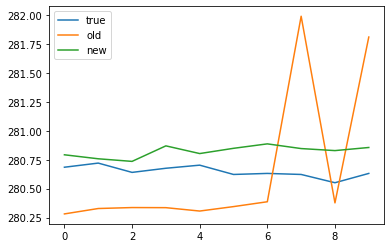

In [129]:
itm = 0
b_inv = min_max.inverse(b[itm])
with th.no_grad():
    b_est_l = min_max.inverse(net_lstm(a)[itm])
    b_est = min_max.inverse(net(a)[itm])
    
plt.plot(b_inv.flatten(), label='true')
plt.plot(b_est_l.flatten(), label='old')
plt.plot(b_est.flatten(), label='new')
plt.legend()

In [10]:
summary(s, (1,1,40))

Layer (type:depth-idx)                        Output Shape              Param #
SCINet_block                                  --                        --
├─SCI_block: 1-1                              [1, 1, 20]                --
│    └─NN_block: 2-1                          [1, 1, 20]                --
│    │    └─Sequential: 3-1                   [1, 1, 20]                56
│    └─NN_block: 2-2                          [1, 1, 20]                --
│    │    └─Sequential: 3-2                   [1, 1, 20]                56
│    └─NN_block: 2-3                          [1, 1, 20]                --
│    │    └─Sequential: 3-3                   [1, 1, 20]                56
│    └─NN_block: 2-4                          [1, 1, 20]                --
│    │    └─Sequential: 3-4                   [1, 1, 20]                56
├─SCI_block: 1-2                              [1, 1, 10]                --
│    └─NN_block: 2-5                          [1, 1, 10]                --
│    │    └─Sequenti